In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Customer Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


replacing blanks with 0 as tenure is 0 and no total charges are records

In [6]:
df["TotalCharges"] = df["TotalCharges"].replace(" ",0)
df["TotalCharges"] = df["TotalCharges"].astype("float")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
df.isnull().sum().sum()

0

In [9]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [11]:
df["customerID"].duplicated().sum()

0

converted 0 and 1 values of senior citizen to yes/no to make it easier to understand 

In [12]:
def conv(value):
    if value == 1:
        return "Yes"
    else:
        return "No"
df["SeniorCitizen"] = df["SeniorCitizen"].apply(conv)

In [13]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


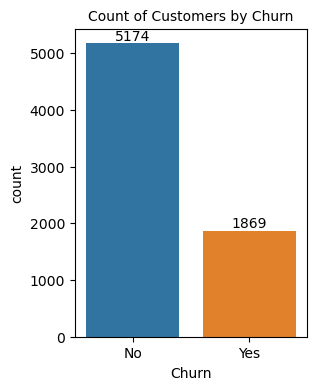

In [25]:
plt.figure(figsize = (3,4))
ax = sns.countplot(x = 'Churn', data = df)

ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Churn", fontsize = 10)
plt.show()

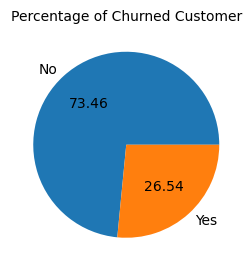

In [22]:
plt.figure(figsize = (3,4))
gb = df.groupby("Churn").agg({'Churn':"count"})
plt.pie(gb['Churn'],labels = gb.index, autopct = "%1.2f")
plt.title("Percentage of Churned Customer", fontsize = 10)

plt.show()


From the given pie chart we can conclude that 26.54% of our customers have chured out.
Let's explor the reson behind it

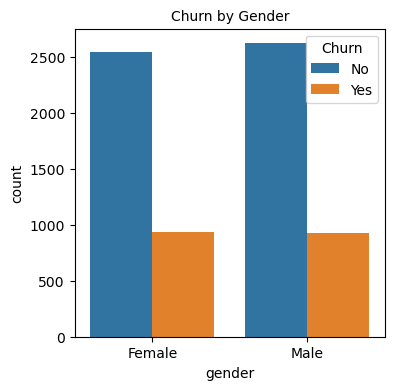

In [30]:
plt.figure(figsize = (4,4))
sns.countplot(x="gender",data = df, hue="Churn")
plt.title("Churn by Gender", fontsize = 10)
plt.show()

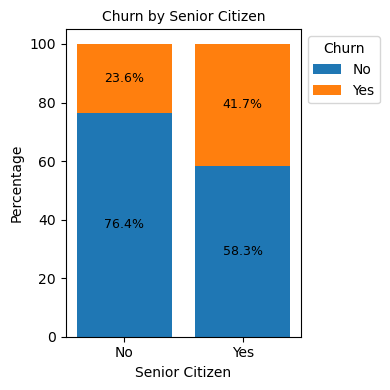

In [40]:
churn_counts = df.groupby(['SeniorCitizen', 'Churn']).size().unstack()

# Convert counts to percentages
churn_percentage = churn_counts.div(churn_counts.sum(axis=1), axis=0) * 100

# Create a stacked bar plot
fig, ax = plt.subplots(figsize=(4, 4))

# Plot 'No' churn percentage
ax.bar(churn_percentage.index, 
       churn_percentage['No'], 
       label='No')

# Plot 'Yes' churn percentage on top of 'No'
ax.bar(churn_percentage.index, 
       churn_percentage['Yes'], 
       bottom=churn_percentage['No'], 
       label='Yes')

# Add percentage labels to each bar segment
for idx in churn_percentage.index:
    no_pct = churn_percentage.loc[idx, 'No']
    yes_pct = churn_percentage.loc[idx, 'Yes']
    ax.text(idx, no_pct / 2, f'{no_pct:.1f}%', ha='center', va='center', color='black', fontsize=9)
    ax.text(idx, no_pct + yes_pct / 2, f'{yes_pct:.1f}%', ha='center', va='center', color='black', fontsize=9)

# Set the title, labels, and legend
ax.set_title('Churn by Senior Citizen', fontsize=10)
ax.set_xlabel('Senior Citizen')
ax.set_ylabel('Percentage')
ax.legend(title='Churn', bbox_to_anchor= (1,1)) #Customize legend location

# Show the plot
plt.tight_layout()
plt.show()

Comparative a greated percentage of people in senior citizen category have churned

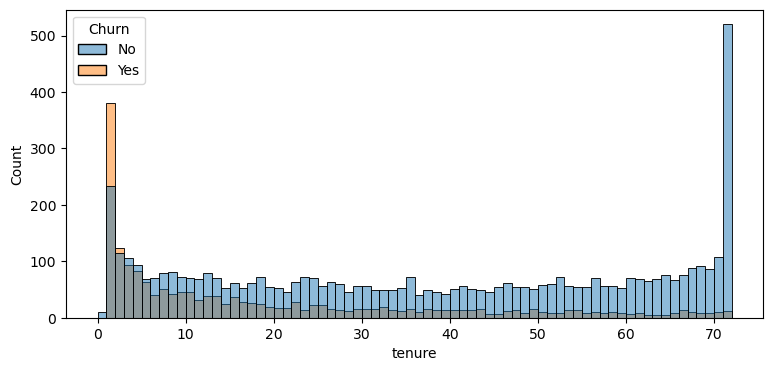

In [45]:
plt.figure(figsize = (9,4))
sns.histplot(x="tenure",data = df, bins = 72,hue = "Churn")
plt.show()

People who have used our services for a long time have stayed and people who have used our services #1 or 2 months have churned

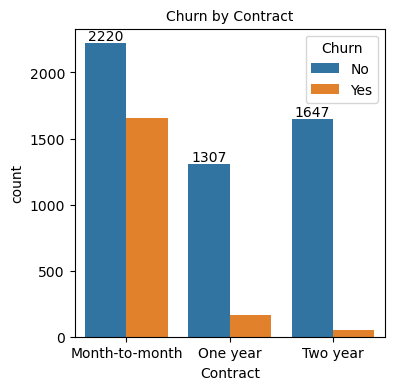

In [51]:
plt.figure(figsize = (4,4))
ax = sns.countplot(x="Contract",data = df, hue="Churn")
ax.bar_label(ax.containers[0])
plt.title("Churn by Contract", fontsize = 10)
plt.show()

People who have month to month contract are likely to churn then from those who have 1 or 2 years or contract.

In [52]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

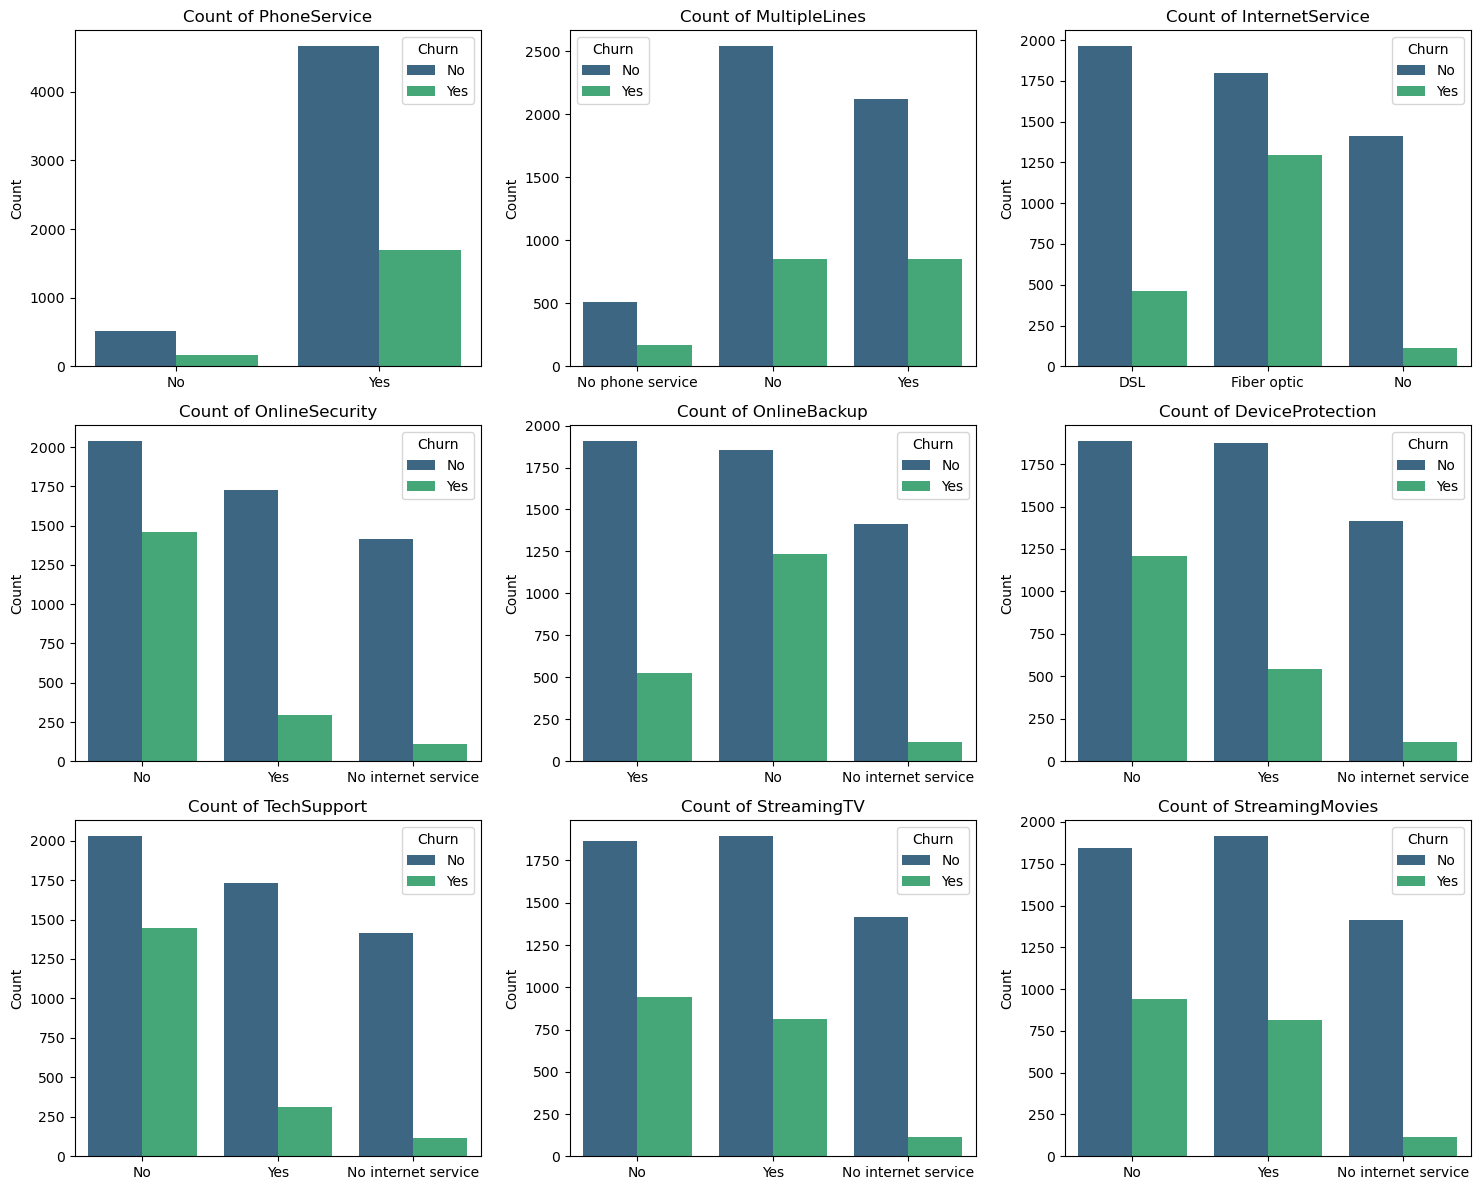

In [54]:
# List of columns to create countplots for
columns = [
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

# Set up the subplots grid: 3 rows x 3 columns (adjust as needed)
fig, axes = plt.subplots(3, 3, figsize=(15, 12))

# Flatten the axes for easier iteration
axes = axes.flatten()

# Iterate through each column and create a countplot
for i, col in enumerate(columns):
    sns.countplot(x=col, data=df, ax=axes[i], palette='viridis', hue = 'Churn')
    axes[i].set_title(f'Count of {col}', fontsize=12)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()


The majority of customers who do not chur tend to have services like PhoneService, InternetService (particularly DSL), and OnlineSecurity enabled. For services like OnlineBackup, TechSupport, and StreamingTV churn rates are noticeably higher when these services are not used or are unavailable.

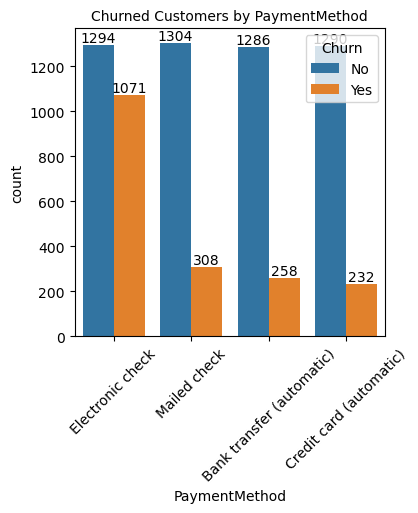

In [55]:
plt.figure(figsize = (4,4))
ax = sns.countplot(x="PaymentMethod",data = df, hue="Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Churned Customers by PaymentMethod", fontsize = 10)
plt.xticks(rotation = 45)
plt.show()

Customer is lokely to churn when he is using electronic check as a payment method. 